In [1]:
import numpy as np
import pandas as pd

In [3]:
## 학습률, bias, epoch, loss 저장 리스트 설정

learning_rate = 0.001
bias = 0.7
epochs = 50
final_epoch_loss = []

In [11]:
random_generator = np.random.default_rng()

array([0.63226469, 0.40461281, 0.21631624])

In [12]:
## 랜덤 가중치 설정 함수

def generate_data(n_features, n_values):
    weights = random_generator.random((1, n_values))[0]
    features = random_generator.random((n_features, n_values))
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["n1", "n2", "n3", "n4"])
    data["target"] = targets
    return data, weights

## 가중치, 값 행렬곱 + bias

def get_weighted_sum(features, weights, bias):
    return np.dot(features, weights) + bias

## 이진 분류를 위한 활성함수 sigmoid 설정ㅈ

def sigmoid(x):
    return 1/(1+np.exp(-x))

## 손실함수 cross_entropy_loss 설정

def cross_entropy_loss(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

## 가중치 업데이트 함수 설정

def update_weights(weights, learning_rate, target, prediction, feature):
    new_weights = []
    for input_x, old_weight in zip(feature, weights):
        new_weight = old_weight + learning_rate*(target - prediction)*input_x
        new_weights.append(new_weight)
    return new_weights

## 가중치 업데이트 실행

def update_bias(bias, learning_rate, target, prediction):
    return bias + learning_rate*(target-prediction)


In [21]:
## 랜덤한 4개의 데이터 + 가중치 설정
data, weights = generate_data(500,4)

def train_model(data, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        individual_loss = []
        for i in range(0, len(data)):
            feature = data.loc[i][:-1] ## data에서 feature 추출
            target = data.loc[i][-1]  ## data에서 타겟 값 추출
            w_sum = get_weighted_sum(features=feature, weights=weights, bias=bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy_loss(target, prediction)
            individual_loss.append(loss)
            weights = update_weights(weights, learning_rate, target, prediction, feature)
            bias = update_bias(bias, learning_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        final_epoch_loss.append(average_loss)
        print(f"Epoch : {epoch} , Loss:  {average_loss}")

In [22]:
train_model(data, weights, bias, learning_rate, epochs)

Epoch : 0 , Loss:  0.3484464490479706
Epoch : 1 , Loss:  0.33120895786242943
Epoch : 2 , Loss:  0.3198669116261405
Epoch : 3 , Loss:  0.3125976356809011
Epoch : 4 , Loss:  0.3080176732258534
Epoch : 5 , Loss:  0.3051594466828333
Epoch : 6 , Loss:  0.3033812294323448
Epoch : 7 , Loss:  0.3022716713071329
Epoch : 8 , Loss:  0.3015727550577579
Epoch : 9 , Loss:  0.30112484928875677
Epoch : 10 , Loss:  0.30083004395668395
Epoch : 11 , Loss:  0.3006286098030739
Epoch : 12 , Loss:  0.300484229507667
Epoch : 13 , Loss:  0.3003748625523519
Epoch : 14 , Loss:  0.30028714447795035
Epoch : 15 , Loss:  0.30021297211702297
Epoch : 16 , Loss:  0.3001474289196528
Epoch : 17 , Loss:  0.3000875272453623
Epoch : 18 , Loss:  0.30003144694181266
Epoch : 19 , Loss:  0.2999780747242295
Epoch : 20 , Loss:  0.299926725611516
Epoch : 21 , Loss:  0.29987697445616335
Epoch : 22 , Loss:  0.2998285540205514
Epoch : 23 , Loss:  0.29978129327203273
Epoch : 24 , Loss:  0.2997350799884552
Epoch : 25 , Loss:  0.2996898

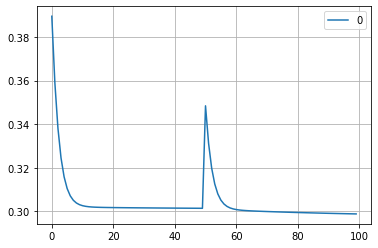

In [24]:
## Figure 그리기

df = pd.DataFrame(final_epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()